In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

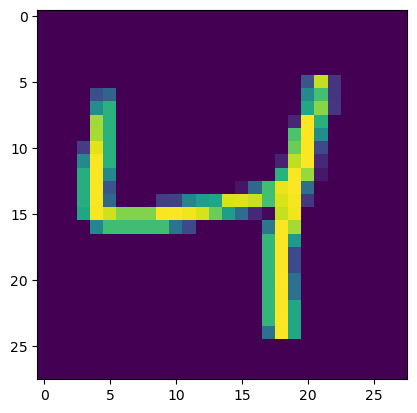

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
import numpy as np

# Assuming X_train has shape (60000, 28, 28)
# Reshape it to (60000, 28, 28, 1) to add the channel dimension
X_train = np.expand_dims(X_train, axis=-1)

In [12]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 35s 727us/sample - loss: 0.2601 - acc: 0.9211 - val_loss: 0.1109 - val_acc: 0.9670
Epoch 2/25
48000/48000 [==============================] - 36s 745us/sample - loss: 0.1161 - acc: 0.9641 - val_loss: 0.0726 - val_acc: 0.9778
Epoch 3/25
48000/48000 [==============================] - 36s 741us/sample - loss: 0.0826 - acc: 0.9745 - val_loss: 0.0673 - val_acc: 0.9791
Epoch 4/25
48000/48000 [==============================] - 35s 731us/sample - loss: 0.0674 - acc: 0.9784 - val_loss: 0.0611 - val_acc: 0.9830
Epoch 5/25
48000/48000 [==============================] - 36s 755us/sample - loss: 0.0539 - acc: 0.9824 - val_loss: 0.0602 - val_acc: 0.9825
Epoch 6/25
48000/48000 [==============================] - 37s 774us/sample - loss: 0.0440 - acc: 0.9858 - val_loss: 0.0612 - val_acc: 0.9833
Epoch 7/25
48000/48000 [==============================] - 1708s 36ms/sample - loss: 0.0380 - acc: 0.9872

In [14]:
import numpy as np

# Assuming X_test has shape (10000, 28, 28)
# Reshape it to (10000, 28, 28, 1) to add the channel dimension
X_test = np.expand_dims(X_test, axis=-1)


In [15]:
y_prob = model.predict(X_test)


In [16]:
y_pred = y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9854

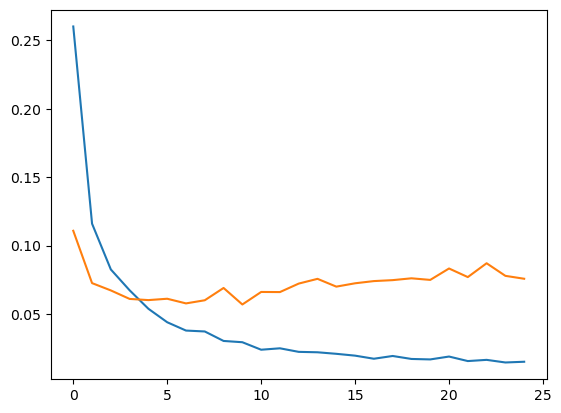

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

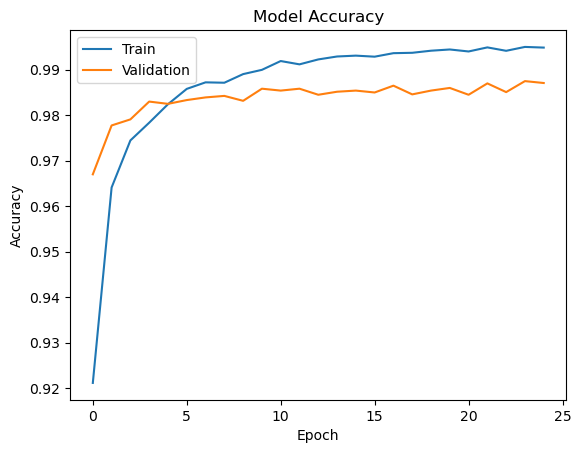

In [21]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['acc'])
# Plot validation accuracy
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



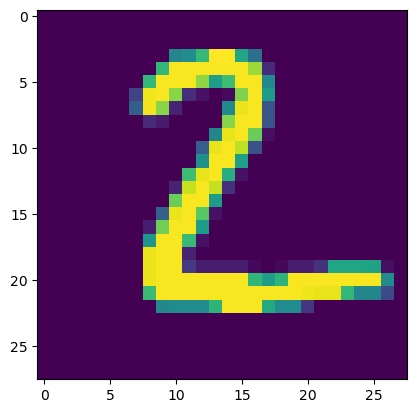

In [22]:
plt.imshow(X_test[1])

In [23]:
y_predicted = model.predict(X_test)
print("Predicted output :  ",np.argmax(y_predicted[1]))

Predicted output :   2


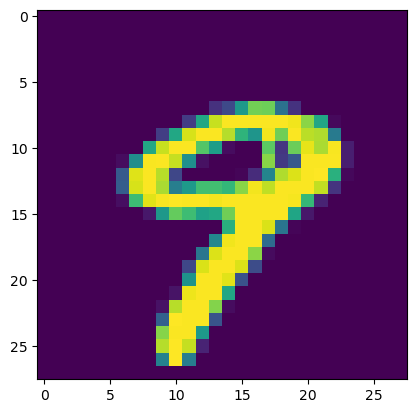

In [24]:
plt.imshow(X_test[9])

In [25]:
y_predicted = model.predict(X_test)
print("Predicted output :  ",np.argmax(y_predicted[9]))  

Predicted output :   9


In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor 'confusion_matrix/SparseTensorDenseAdd:0' shape=(10, 10) dtype=int32>

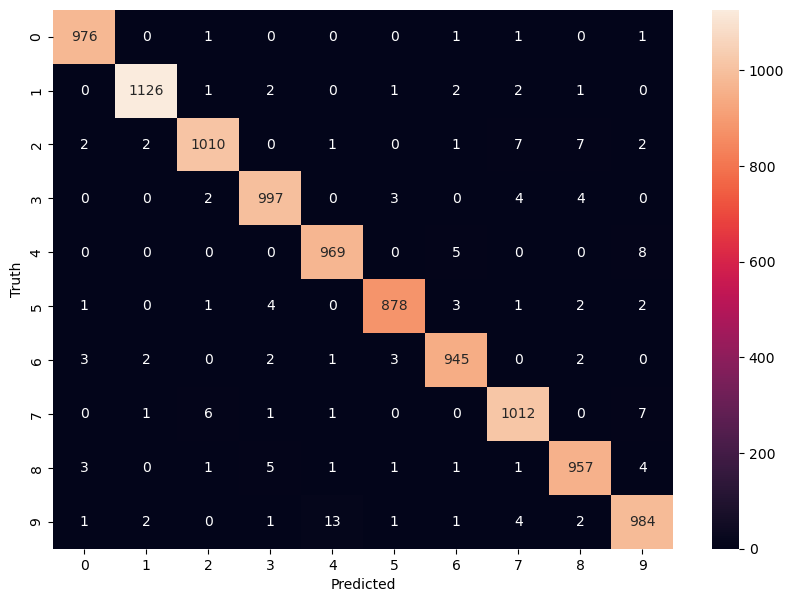

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming cm is your confusion matrix
# Assuming you have a TensorFlow session or are using Eager Execution
with tf.Session() as sess:
    cm_np = sess.run(cm)  # Convert the tensor to a NumPy array

plt.figure(figsize=(10, 7))
sns.heatmap(cm_np, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
